# Data Cleaning and EDA
---

In this section, import and clean text data and explore it using Count Vectorizer and Tfidf Vectorizer to look at common words that appear in the subreddit posts, as well as to see if the two subreddits contain similar lengths of posts by examining the distribution of their word counts.

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

In [332]:
# Import raw data.
df = pd.read_csv('../data/raw_data.csv')

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    10000 non-null  object
 1   selftext     5240 non-null   object
 2   title        10000 non-null  object
 3   created_utc  10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [334]:
df['title'] = df['title'].astype(str)

In [335]:
# Separate data by subreddit for comparison
lotr = df[df['subreddit'] == 'lotr']
hp = df[df['subreddit'] == 'harrypotter']

### Count Vectorizer
---

For preliminary analysis, will be looking at the most reoccurring words in the two subreddits using CountVectorizer to split the text data in the 'title' of posts into words.

In [336]:
# Instantiate count vectorizer and select the default stop words not to include in our analysis.
cv = CountVectorizer(stop_words = 'english')

lotr_vect = cv.fit_transform(lotr['title'].astype('str'))
lotr_vect_df = pd.DataFrame(lotr_vect.todense(), columns=cv.get_feature_names_out())

hp_vect = cv.fit_transform(hp['title'].astype('str'))
hp_vect_df = pd.DataFrame(hp_vect.todense(), columns=cv.get_feature_names_out())

In [337]:
lotr_vect_df.sum().sort_values(ascending=False).head(50)

lotr          550
ring          315
tolkien       310
rings         310
hobbit        245
just          240
new           205
did           195
lord          185
books         175
year          175
like          170
book          160
got           160
sauron        160
gandalf       160
know          155
fellowship    140
time          130
middle        130
birthday      125
christmas     125
movies        120
power         115
earth         115
does          110
tattoo        105
today         105
king          105
ve            100
favorite      100
question      100
edition        95
day            90
think          90
frodo          90
reading        85
best           85
bilbo          85
trilogy        85
movie          85
age            80
read           80
love           80
aragorn        80
world          75
people         75
gift           75
good           75
happy          75
dtype: int64

In [338]:
hp_vect_df.sum().sort_values(ascending=False).head(50)

harry         1100
potter         770
hogwarts       405
movies         330
books          300
did            295
think          290
book           235
voldemort      200
movie          195
just           180
like           180
does           180
legacy         180
know           175
covers         170
dumbledore     165
wand           165
snape          155
hp             155
character      125
world          120
question       120
series         115
house          110
time           105
new            105
opinion        100
got            100
magic          100
child           95
ve              95
wizarding       90
hermione        90
people          90
reading         90
don             90
best            90
cursed          85
use             85
really          85
favorite        85
wizard          85
rowling         80
good            80
chamber         75
ron             75
films           75
game            75
thing           75
dtype: int64

See some of the same word root (ie. books and book). Will want to use a lemmatizer to eliminate repeats.

In [318]:
def custom_lemmatizer(text):
    wnet = WordNetLemmatizer()
    return [wnet.lemmatize(w) for w in text.split(" ")]
# Code from Breakfast-Hour 1/10/2023.

In [319]:
def custom_preprocessor(text):
    text = text.lower() 
    text = re.sub('\\n', '', text)
    text = re.findall("[\w']+|\$[\d\.]+", text)
    text = " ".join(text)
    
    return text

In [320]:
# Lemmatize stop words.
lem_stopwords = [wnet.lemmatize(w) for w in stopwords.words('english')]
cv = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=custom_lemmatizer,
    preprocessor=custom_preprocessor    
    )

* Source for custom_preprocesssor: combined code from Breakfast-Hour 1/10/2023 ([link](https://git.generalassemb.ly/dsir-1128/breakfast-hour/tree/main/06_week/110-tue)).

In [321]:
lotr_vect = cv.fit_transform(lotr['title'].astype('str'))
lotr_vect_df = pd.DataFrame(lotr_vect.todense(), columns=cv.get_feature_names_out())

hp_vect = cv.fit_transform(hp['title'].astype('str'))
hp_vect_df = pd.DataFrame(hp_vect.todense(), columns=cv.get_feature_names_out())

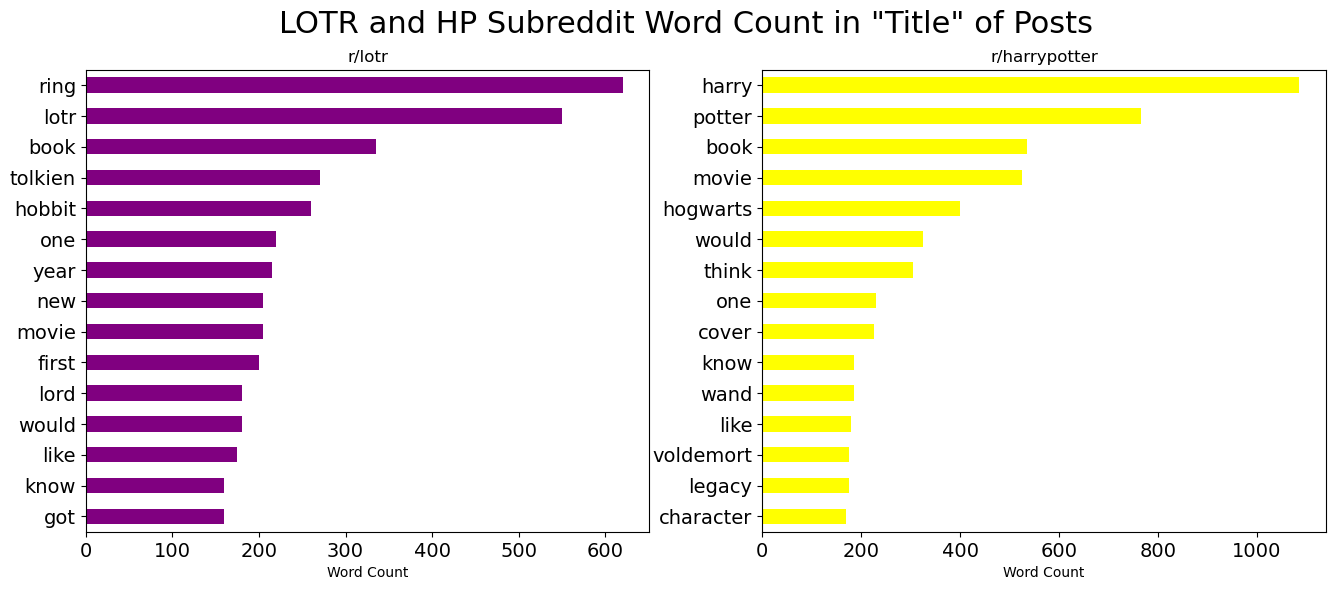

In [322]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
lotr_vect_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'purple', ax = ax[0], fontsize = 14);
hp_vect_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'yellow', ax = ax[1], fontsize = 14);

ax[0].invert_yaxis();
ax[1].invert_yaxis();

ax[0].set(xlabel='Word Count', title='r/lotr')
ax[1].set(xlabel='Word Count', title='r/harrypotter')

fig.suptitle('LOTR and HP Subreddit Word Count in "Title" of Posts', fontsize=22);

Code inspired again from Breakfast hour Lesson from 1/10/2023.

In [323]:
hp_vect_df.sum().sort_values(ascending=False).head(50)

harry         1085
potter         765
book           535
movie          525
hogwarts       400
would          325
think          305
one            230
cover          225
know           185
wand           185
like           180
voldemort      175
legacy         175
character      170
anyone         170
first          155
question       155
hp             155
snape          145
house          140
dumbledore     140
get            130
film           130
time           130
wizard         125
thing          125
could          125
child          120
series         115
world          115
new            105
made           105
opinion        105
year           105
magic          100
got            100
reading         90
see             90
best            90
scene           90
wizarding       90
good            90
people          90
use             85
hermione        85
game            85
really          85
make            85
cursed          85
dtype: int64

### Term Frequency-Inverse Document Frequency(Tfidf) Vectorizer
---

Instead of tokenizing words by the amount they appear in each subreddit using the Count Vectorizer, can get a better idea of the relative importance of each word in each post relative to others in the subreddit by using the TFIDF Vectorizer.

In [324]:
tf = TfidfVectorizer(
    stop_words = lem_stopwords,
    tokenizer = custom_lemmatizer,
    preprocessor = custom_preprocessor,
    )

lotr_vect_tf = tf.fit_transform(lotr['title'].astype('str'))
lotr_vect_tf_df = pd.DataFrame(lotr_vect_tf.todense(), columns=tf.get_feature_names_out())

hp_vect_tf = tf.fit_transform(hp['title'].astype('str'))
hp_vect_tf_df = pd.DataFrame(hp_vect_tf.todense(), columns=tf.get_feature_names_out())

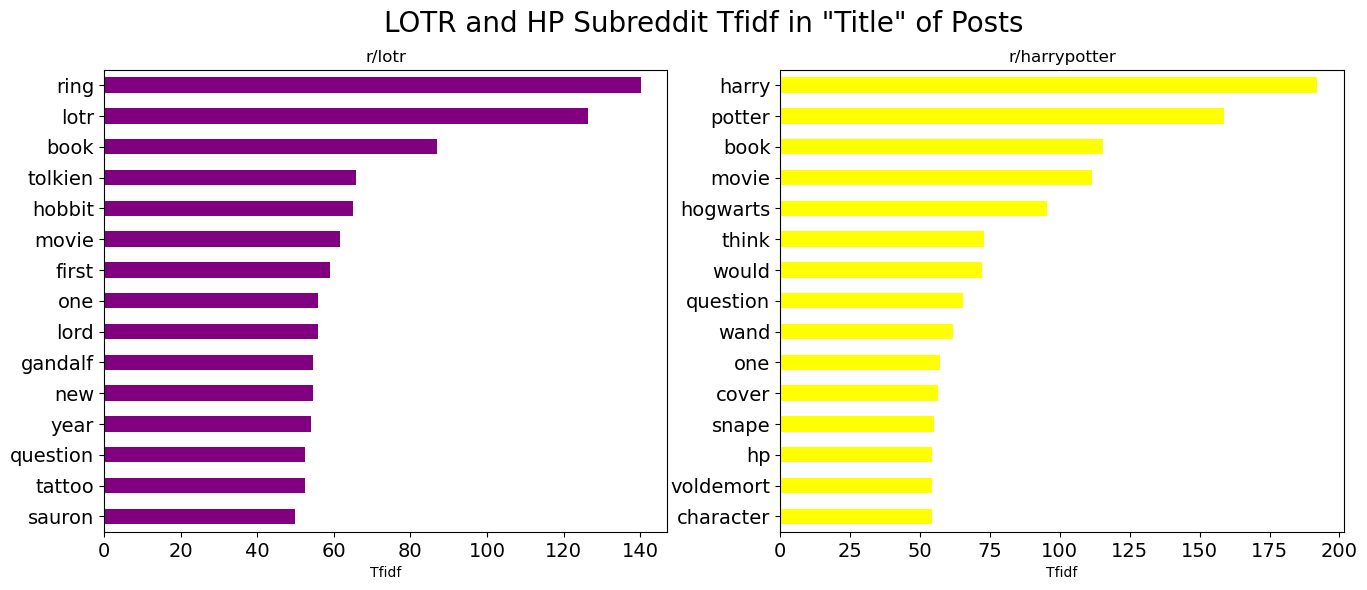

In [325]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
lotr_vect_tf_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'purple', ax = ax[0], fontsize = 14);
hp_vect_tf_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'yellow', ax = ax[1], fontsize = 14);

ax[0].invert_yaxis()
ax[1].invert_yaxis();

ax[0].set(xlabel='Tfidf', title='r/lotr')
ax[1].set(xlabel='Tfidf', title='r/harrypotter')

fig.suptitle('LOTR and HP Subreddit Tfidf in "Title" of Posts', fontsize=20);

### Bigrams
---

Instead of looking at individual words, can sort text data by bigrams and see if the results are different. Considering how many characters are apart of each series, expect to see lots of proper names.

In [326]:
cv = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=custom_lemmatizer,
    preprocessor=custom_preprocessor,
    ngram_range = [2,2] # Added this parameter to Count Vectorizer.
    )

In [327]:
lotr_vect = cv.fit_transform(lotr['title'].astype('str'))
lotr_vect_df = pd.DataFrame(lotr_vect.todense(), columns=cv.get_feature_names_out())

hp_vect = cv.fit_transform(hp['title'].astype('str'))
hp_vect_df = pd.DataFrame(hp_vect.todense(), columns=cv.get_feature_names_out())

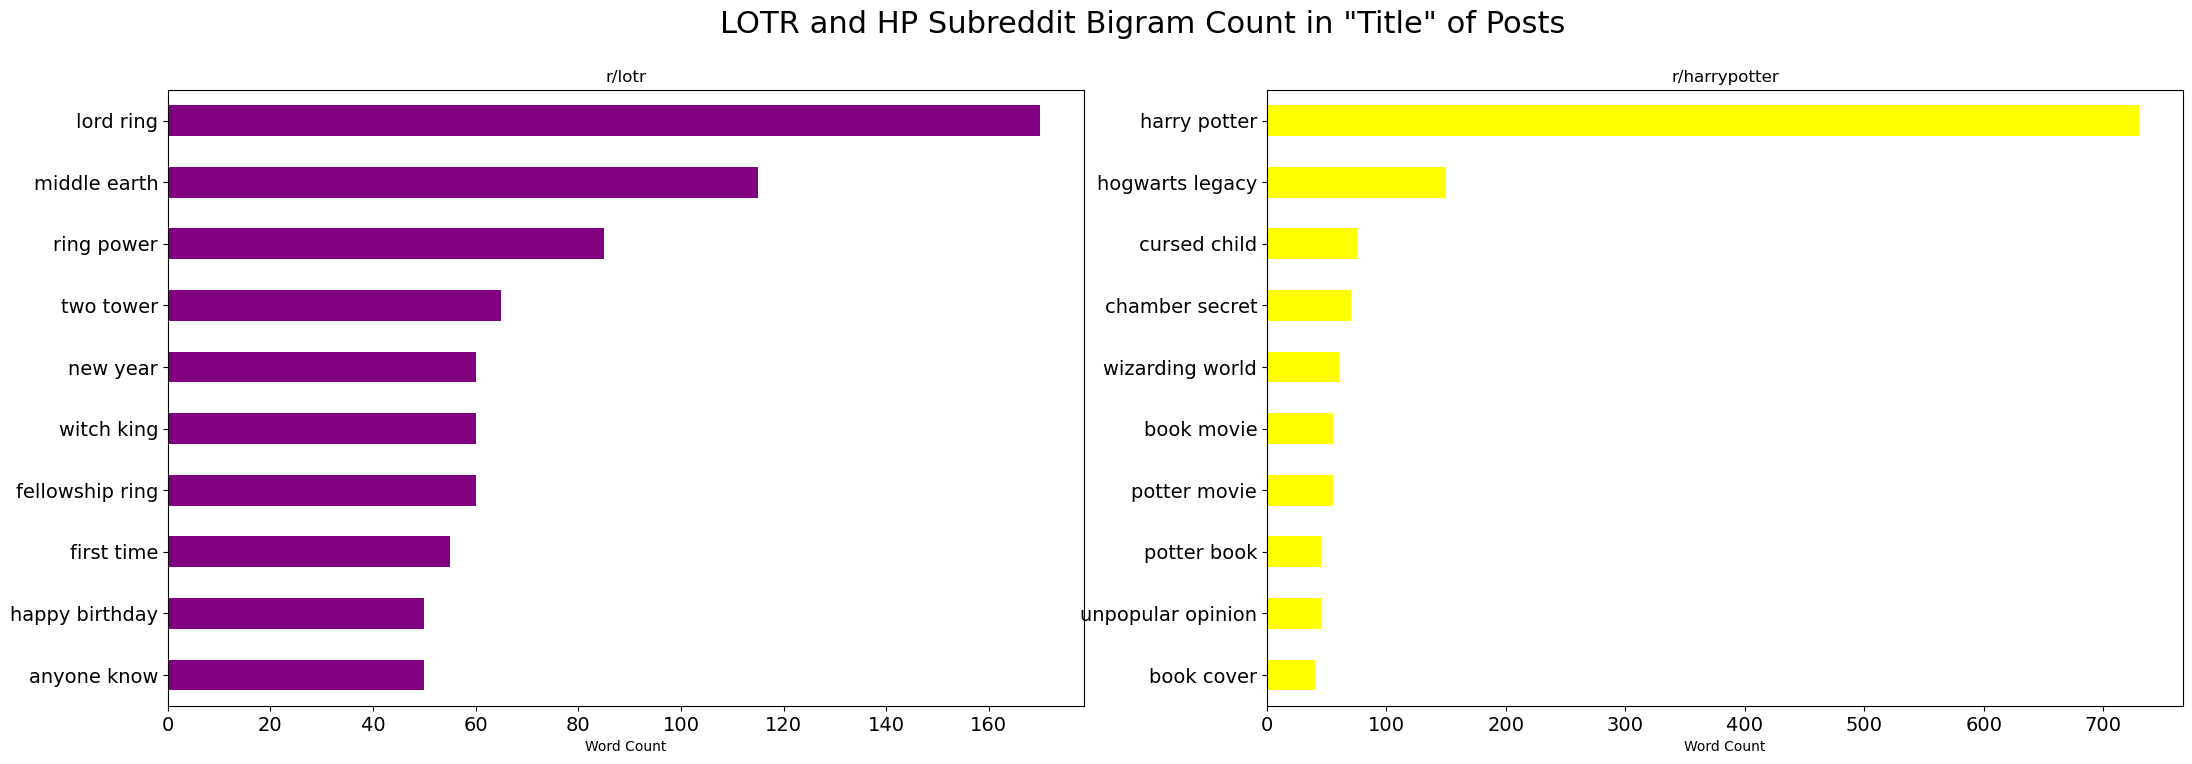

In [328]:
fig, ax = plt.subplots(1,2, figsize=(26,8))
lotr_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'purple', ax = ax[0], fontsize = 14);
hp_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = 'yellow', ax = ax[1], fontsize = 14);

ax[0].invert_yaxis();
ax[1].invert_yaxis();

ax[0].set(xlabel='Word Count', title='r/lotr')
ax[1].set(xlabel='Word Count', title='r/harrypotter')

fig.suptitle('LOTR and HP Subreddit Bigram Count in "Title" of Posts', fontsize=22);

Surprised not to see any proper names, other than "harry potter".

### Comparing Subreddit Posts Based on Length
---

In [351]:
# Add column containing 
df['word_count'] = df['title'].apply(lambda x: len(x.split()))

# Code from Breakfast hour, 1/10/2023.

In [347]:
lotr = df[df['subreddit'] == 'lotr']
hp = df[df['subreddit'] == 'harrypotter']

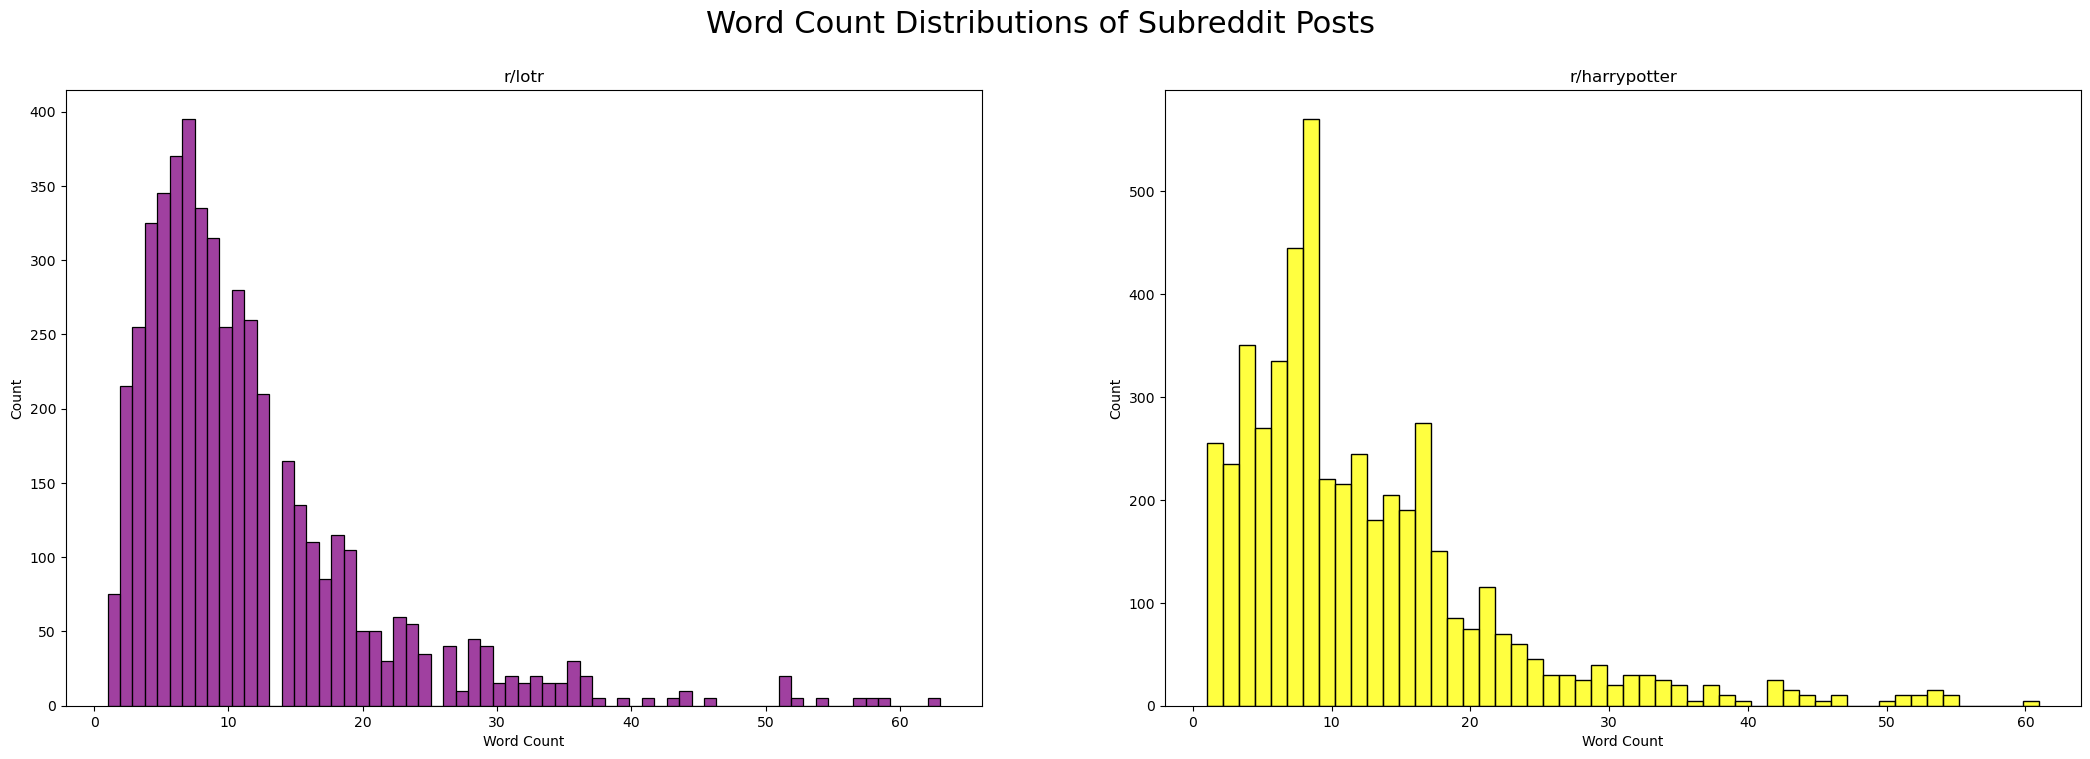

In [350]:
fig, ax = plt.subplots(1,2, figsize=(26,8))
sns.histplot(lotr['word_count'],ax=ax[0], color = 'purple')
sns.histplot(hp['word_count'], ax=ax[1], color = 'yellow')

ax[0].set(xlabel='Word Count', title='r/lotr')
ax[1].set(xlabel='Word Count', title='r/harrypotter')

fig.suptitle('Word Count Distributions of Subreddit Posts', fontsize=22);

Overall distributions of word counts of posts in the two subreddits look quite similar.

### Up Next
---

Now that we have explored the text data in the subreddit posts, will create and test different models in the next section.